## [Build a Simple LLM Application with LCEL](https://python.langchain.com/docs/tutorials/llm_chain/)

1. application will translate text from English into another language
2. it's just a single LLM call plus some prompting.
3. After this, you'll have a high level overview of:
   - Using language models
   - Using PromptTemplates and OutputParsers
   - Using LangChain Expression Language (LCEL) to chain components together
   - Debugging and tracing your application using LangSmith
   - Deploying your application with LangServe

Demo
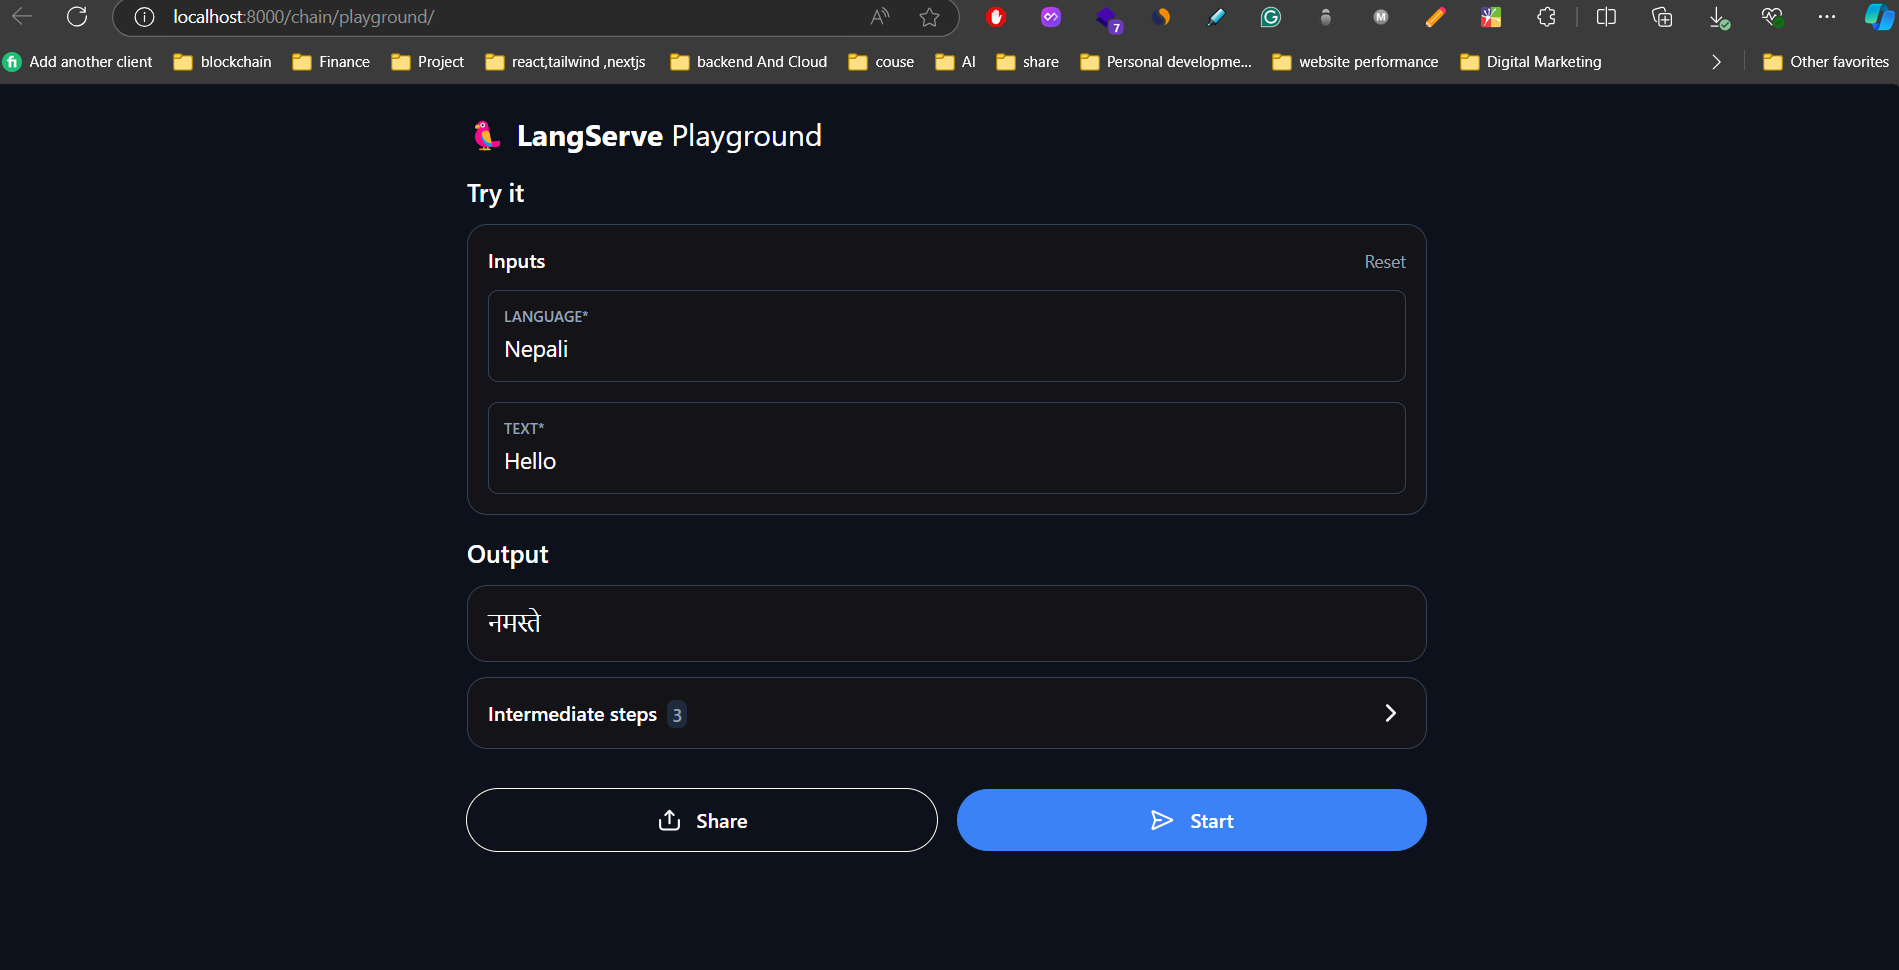


## [Setup](https://python.langchain.com/docs/tutorials/llm_chain/#setup)

1. Document use Jupyter notebooks.

#### [Installation](https://python.langchain.com/docs/tutorials/llm_chain/#installation)

```bash
pip install langchain
```


### [LangSmith](https://python.langchain.com/docs/tutorials/llm_chain/#langsmith)

1. it becomes crucial to be able to inspect what exactly is going on inside your **chain or agent.** The best way to do this is with **LangSmith.**

```bash
export LANGCHAIN_TRACING_V2="true"
export LANGCHAIN_API_KEY="..."
```


In [10]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

## [Using Language Model](https://python.langchain.com/docs/tutorials/llm_chain/#using-language-models)

```bash
pip install -qU langchain-openai
```


In [14]:
os.environ["OPENAI_API_KEY"] = getpass.getpass()
from langchain_openai import ChatOpenAI

model =ChatOpenAI(model="gpt-4")

from langchain_core.messages import HumanMessage,SystemMessage

message =[
    SystemMessage(content="Translate the following from English into Italian"),
    HumanMessage(content="hi!"),
]
result = model.invoke(message)
print(result)     

content='ciao!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 20, 'total_tokens': 23, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-2dc40442-0044-4f27-8202-474419233b79-0' usage_metadata={'input_tokens': 20, 'output_tokens': 3, 'total_tokens': 23}


1. ChatModels are instances of **LangChain "Runnables"**, which means they expose a **standard interface for interacting with them.**
2. To just simply call the model, we can pass in a **list of messages** to the **.invoke method.**


## [OutputParsers](https://python.langchain.com/docs/tutorials/llm_chain/#outputparsers)

1. We first import the simple output parser.
2. we could save the result of the language model call and then pass it to the parser.


In [15]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()
parser.invoke(result)

# "chain" the model with this output parser.

chain= model |parser 
chain.invoke(message)

'ciao!'

## [Prompt Templates](https://python.langchain.com/docs/tutorials/llm_chain/#prompt-templates)

1. PromptTemplates are a concept in LangChain designed to assist with this transformation
2. two variables that is language and text


In [1]:
from langchain_core.prompts import ChatPromptTemplate
system_template = "Translate the following into {language}:"
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", system_template),
        ("human", "{text}"),
    ]

)
result = prompt_template.invoke({"language": "italian", "text": "hi"})

print(result) 
result.to_messages()


messages=[SystemMessage(content='Translate the following into italian:', additional_kwargs={}, response_metadata={}), HumanMessage(content='hi', additional_kwargs={}, response_metadata={})]


[SystemMessage(content='Translate the following into italian:', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='hi', additional_kwargs={}, response_metadata={})]

## [Chaining together components with LCEL](https://python.langchain.com/docs/tutorials/llm_chain/#chaining-together-components-with-lcel)

1.


In [18]:
chain = prompt_template | model | parser
chain.invoke({"language":"italian", "text":"hi"}) 

'ciao'

## [Serving with LangServe](https://python.langchain.com/docs/tutorials/llm_chain/#serving-with-langserve)

1. LangServe helps developers deploy LangChain chains as a REST API
2. pip install "langserve[all]"
3. python serve.py


## [PlayGround](https://python.langchain.com/docs/tutorials/llm_chain/#playground)

1. Every LangServe service comes with a simple built-in UI for configuring and invoking the application with streaming output and visibility into intermediate steps.


## [Client](https://python.langchain.com/docs/tutorials/llm_chain/#client)


In [1]:
from langserve import RemoteRunnable

remote_chain = RemoteRunnable("http://localhost:8000/chain/")
remote_chain.invoke({"language": "italian", "text": "hi"})

'Ciao'